**PROCESAMIENTO DE IMÁGENES PARA MEJORAR EXTRACCIÓN DE TEXTO CON BASE EN OCR**

In [ ]:
#Instalamos Tesseract

!pip install pytesseract
!apt-get install tesseract-ocr
!pip install PyMuPDF pytesseract
import pytesseract
pytesseract.pytesseract.tesseact_cmd='/usr/bin/tesseract'

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 10 not upgraded.


In [ ]:
import cv2

In [ ]:
import fitz
from PIL import Image
import pytesseract
!pip install PyPDF2
import PyPDF2
import numpy as np

In [ ]:
# Establecemos ruta del Estudio de Sector del CSJ

pdf_file_path='/content/CSJ_Mobiliario_2018.pdf'

In [ ]:
# Cargamos PDF

pdf_doc=fitz.open(pdf_file_path)

In [ ]:
# Generamos una cadena vacía para incorporar posteriormente el texto extraido

page_number=2

In [ ]:
# Extraemos página

page=pdf_doc.load_page(page_number)

In [ ]:
# Convertimos página en imágen PIL

pix=page.get_pixmap()
image=Image.frombytes("RGB",[pix.width, pix.height], pix.samples)

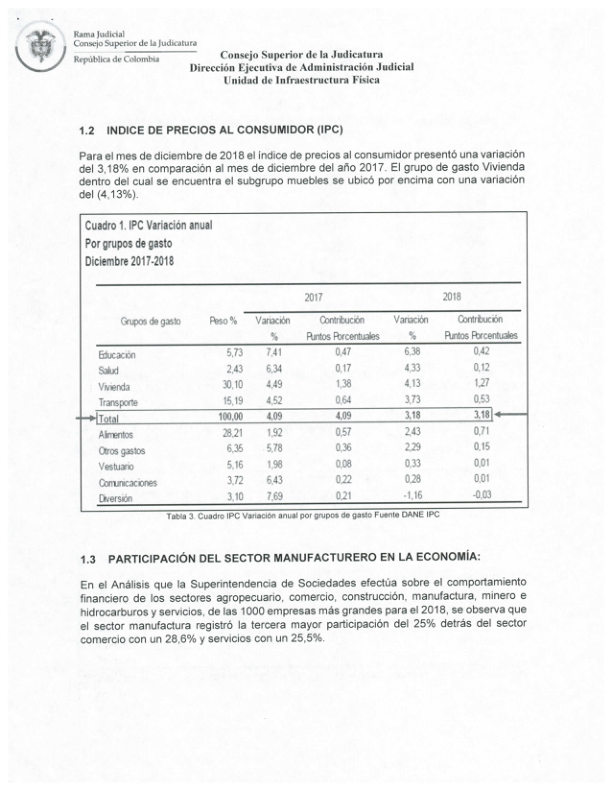

In [ ]:
image

In [ ]:
# Convertimos Imágen PIL en formato OpenCV

image_cv=cv2.cvtColor(np.array(image),cv2.COLOR_RGB2BGR)

In [ ]:
# Convertimos a Escala de Grises

gray=cv2.cvtColor(image_cv, cv2.COLOR_BGR2GRAY)

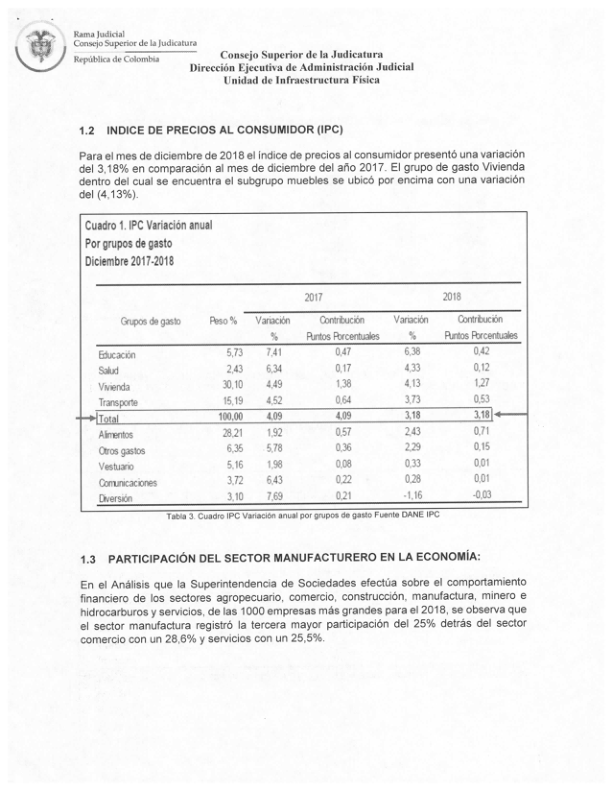

In [ ]:
import IPython

# Mostramos resultado

encoded_gray=cv2.imencode('.png', gray)[1]
display(IPython.display.Image(data=encoded_gray))

In [ ]:
# Filtro Gaussian Blur

blurred=cv2.GaussianBlur(gray, (1,1),0)

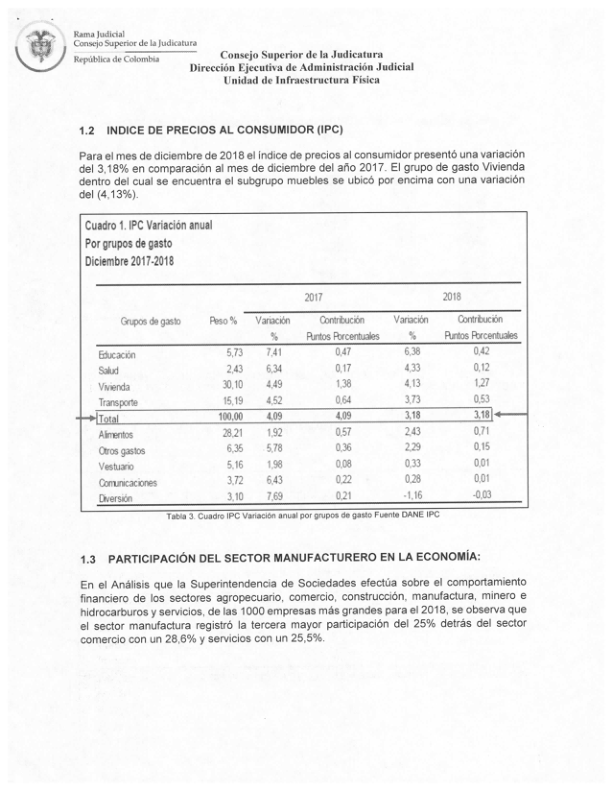

In [ ]:
# Mostramos resultado

encoded_blurred=cv2.imencode('.png', blurred)[1]
display(IPython.display.Image(data=encoded_blurred))

In [ ]:
# Filtro Median Blur

median_blured=cv2.medianBlur(gray,1)

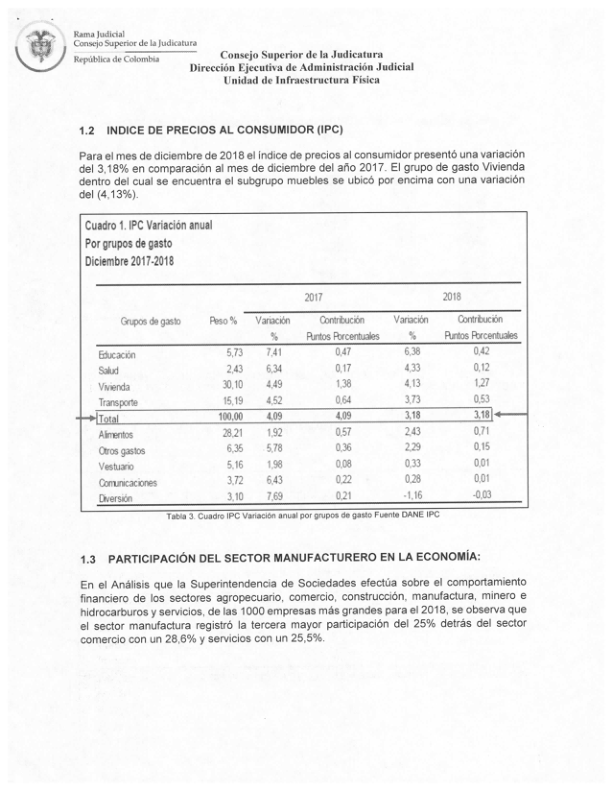

In [ ]:
# Mostramos resultado

encoded_median_blurred=cv2.imencode('.png', median_blured)[1]
display(IPython.display.Image(data=encoded_median_blurred))

In [ ]:
# Utilizamos umbral con Otsu

_, binary_otsu=cv2.threshold(gray, 0, 250, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

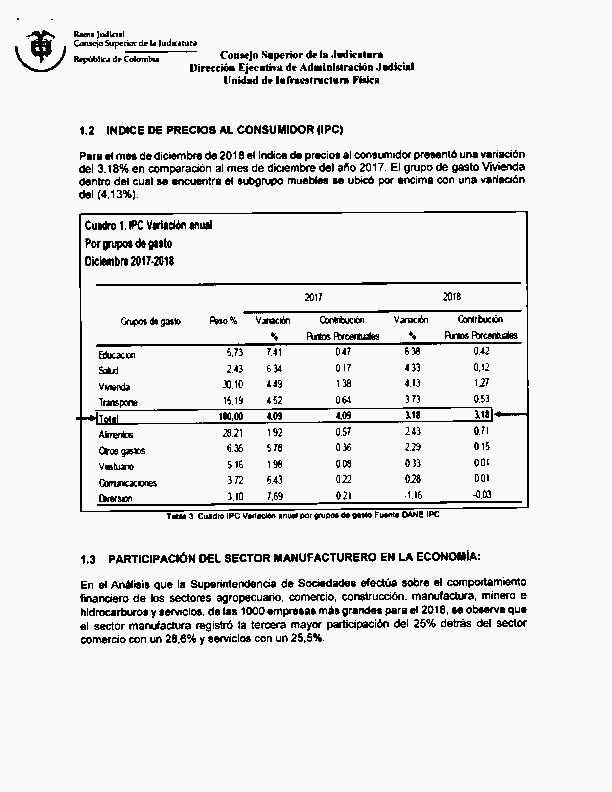

In [ ]:
# Mostramos resultado

encoded_binary=cv2.imencode('.png', binary_otsu)[1]
display(IPython.display.Image(data=encoded_binary))

In [ ]:
# Ahora utilizamos umbral adaptativo

thresholded_image=cv2.adaptiveThreshold(gray, 250, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 3, 7)

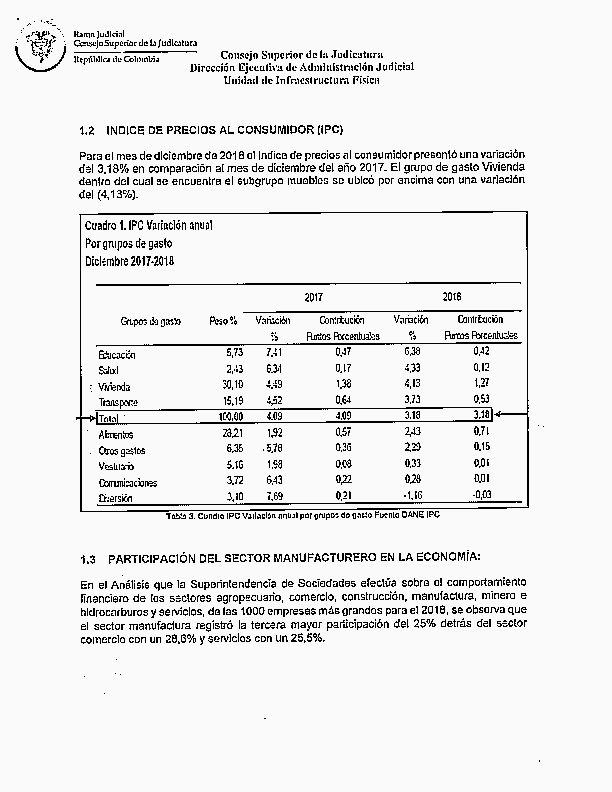

In [ ]:
# Mostramos resultado

encoded_thresholded=cv2.imencode('.png', thresholded_image)[1]
display(IPython.display.Image(data=encoded_thresholded))

In [ ]:
# Operación Morfológica para cerrar pequeños huecos

kernel=np.ones((1,1), np.uint8)
morph_close=cv2.morphologyEx(binary_otsu, cv2.MORPH_CLOSE, kernel)

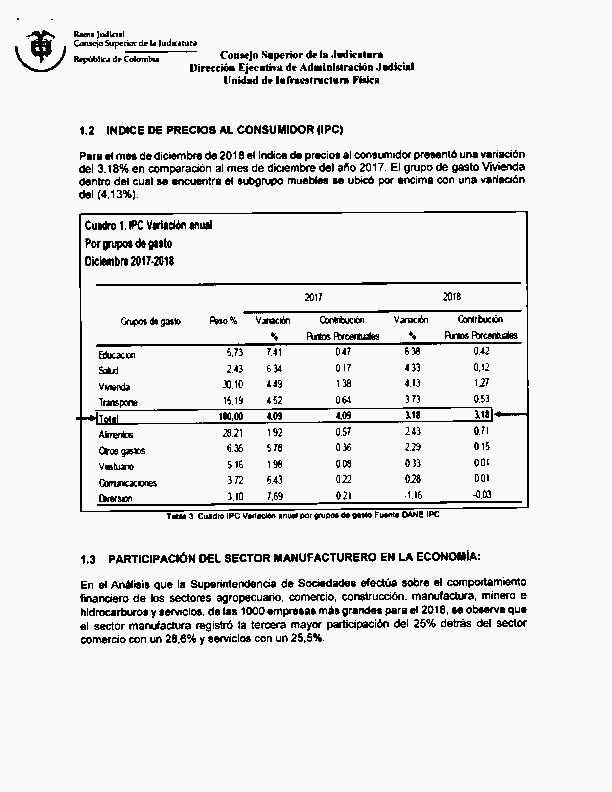

In [ ]:
# Mostramos resultado

encoded_morph_close=cv2.imencode('.png', morph_close)[1]
display(IPython.display.Image(data=encoded_morph_close))

In [ ]:
# Operación Morfológica para cerrar pequeñas manchas blancas

morph_open=cv2.morphologyEx(binary_otsu, cv2.MORPH_OPEN, kernel)

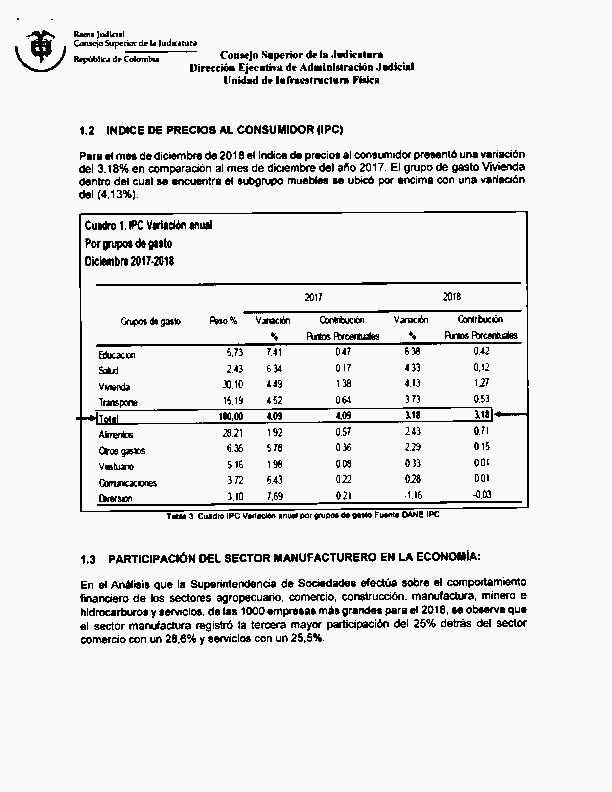

In [ ]:
# Mostramos resultado

encoded_morph_open=cv2.imencode('.png', morph_open)[1]
display(IPython.display.Image(data=encoded_morph_open))

In [ ]:
# Detección de bordes con Canny

edges=cv2.Canny(gray, 100,200)

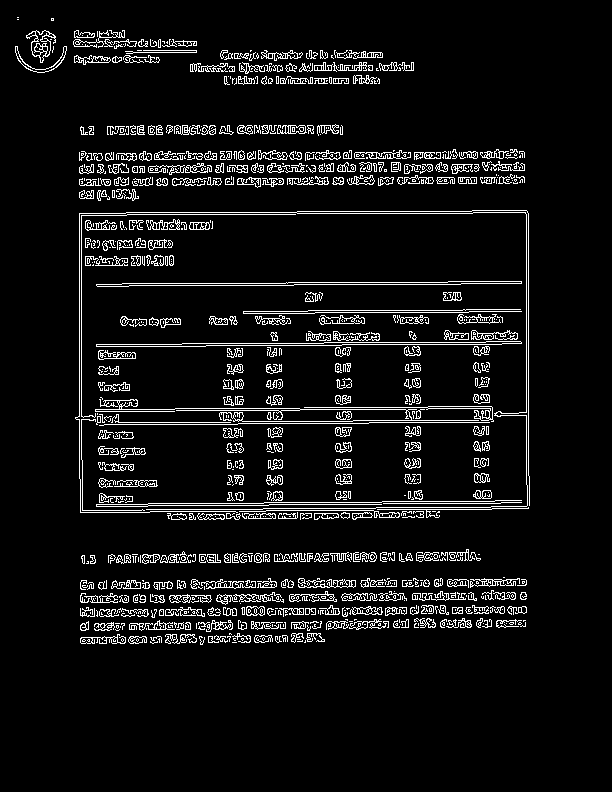

In [ ]:
# Mostramos resultado

encoded_edges=cv2.imencode('.png', edges)[1]
display(IPython.display.Image(data=encoded_edges))

In [ ]:
# Mejoramiento de contraste

clahe=cv2.createCLAHE(clipLimit=1.0, tileGridSize=(3,3))
contrast_enhanced=clahe.apply(gray)

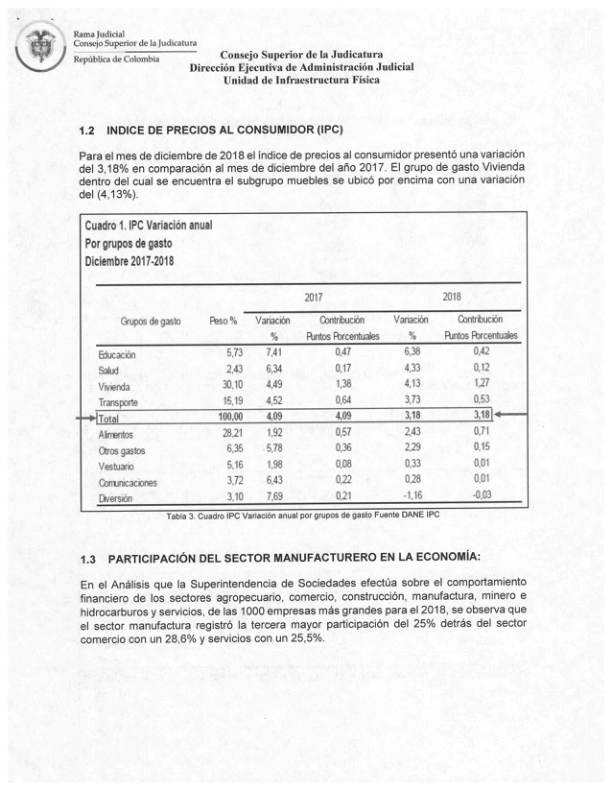

In [ ]:
# Mostramos resultado

encoded_contrast=cv2.imencode('.png', contrast_enhanced)[1]
display(IPython.display.Image(data=encoded_contrast))

In [ ]:
# Equalization de Histograma

hist_equalized=cv2.equalizeHist(gray)

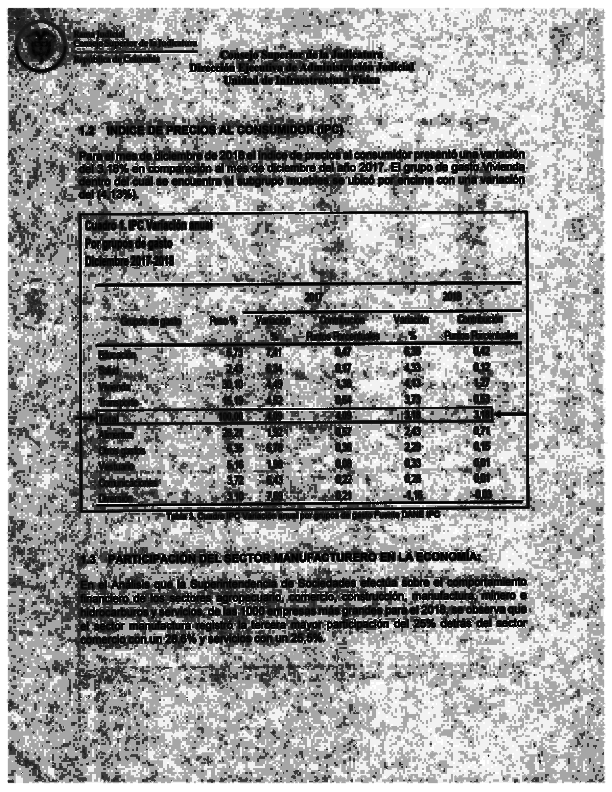

In [ ]:
# Mostramos resultado

encoded_hist=cv2.imencode('.png', hist_equalized)[1]
display(IPython.display.Image(data=encoded_hist))

In [ ]:
# Remoción de sombras

lab=cv2.cvtColor(image_cv, cv2.COLOR_BGR2Lab)
l,a,b=cv2.split(lab)
l2=clahe.apply(l)
shadow_removed=cv2.merge([l2,a,b])
shadow_removed_gray=cv2.cvtColor(shadow_removed, cv2.COLOR_Lab2BGR)

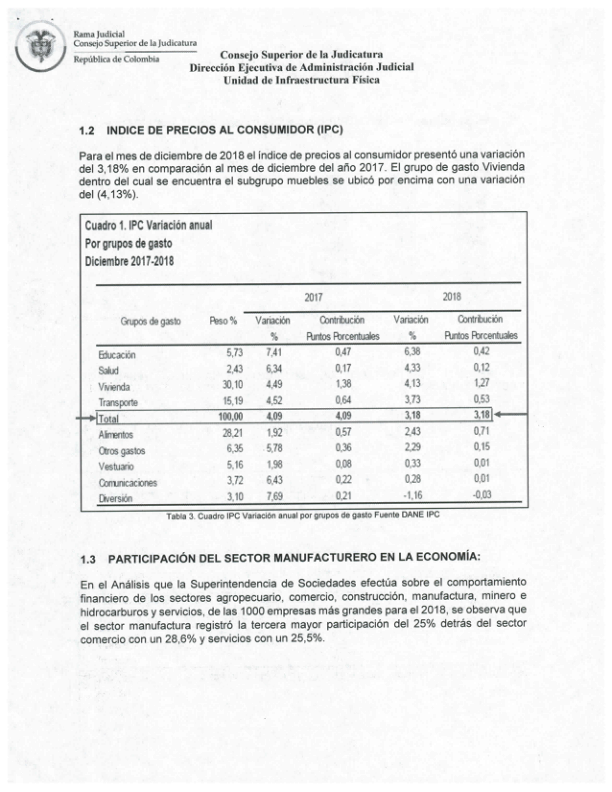

In [ ]:
# Mostramos resultado

encoded_shadow=cv2.imencode('.png', shadow_removed_gray)[1]
display(IPython.display.Image(data=encoded_shadow))

In [ ]:
import matplotlib.pyplot as plt

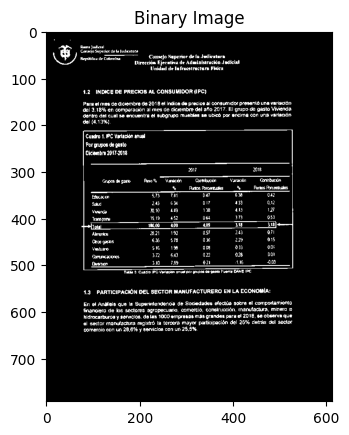

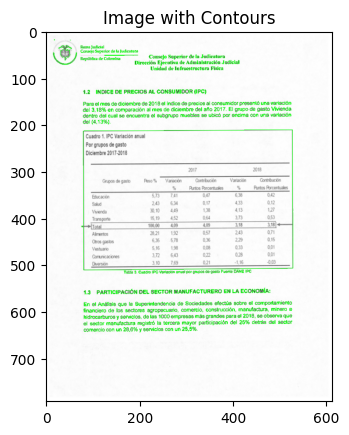

In [ ]:
# Detección y extracción de tablas

_, binary = cv2.threshold(gray, 0, 250, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Debug: Display the binary image
plt.imshow(binary, cmap='gray')
plt.title("Binary Image")
plt.show()

# Debug: Draw contours on the original image
image_with_contours = cv2.cvtColor(gray, cv2.COLOR_GRAY2BGR)  # Convert to BGR format for coloring
cv2.drawContours(image_with_contours, contours, -1, (0, 255, 0), 1)  # Draw contours in green
plt.imshow(cv2.cvtColor(image_with_contours, cv2.COLOR_BGR2RGB))  # Convert to RGB for matplotlib
plt.title("Image with Contours")
plt.show()

min_width = 150
min_height = 150

for contour in contours:
    x, y, w, h = cv2.boundingRect(contour)
    if w<min_width or h<min_height:
      continue
    roi=gray[y:y+h, x:x+w]

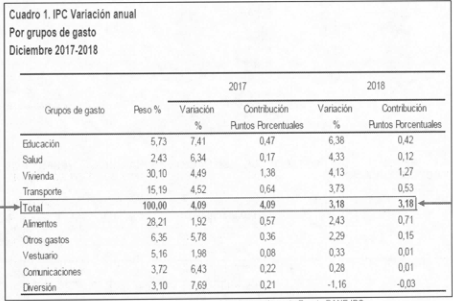

In [ ]:
# Mostramos resultado

encoded_roi=cv2.imencode('.png', roi)[1]
display(IPython.display.Image(data=encoded_roi))

In [ ]:
# Remoción líneas

binary1=cv2.threshold(gray,0,250,cv2.THRESH_BINARY_INV +cv2.THRESH_OTSU)[1]

horizontal_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (30, 1))
detected_lines = cv2.morphologyEx(binary1, cv2.MORPH_OPEN, horizontal_kernel, iterations=2)
contours, _ = cv2.findContours(detected_lines, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
for contour in contours:
    x, y, w, h = cv2.boundingRect(contour)
    cv2.drawContours(binary1, [contour], -1, (0, 0, 0), 4)

vertical_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1, 30))
detected_lines = cv2.morphologyEx(binary1, cv2.MORPH_OPEN, vertical_kernel, iterations=2)
contours, _ = cv2.findContours(detected_lines, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
for contour in contours:
    x, y, w, h = cv2.boundingRect(contour)
    cv2.drawContours(binary1, [contour], -1, (0, 0, 0), 4)

line_removed=cv2.bitwise_not(binary1)


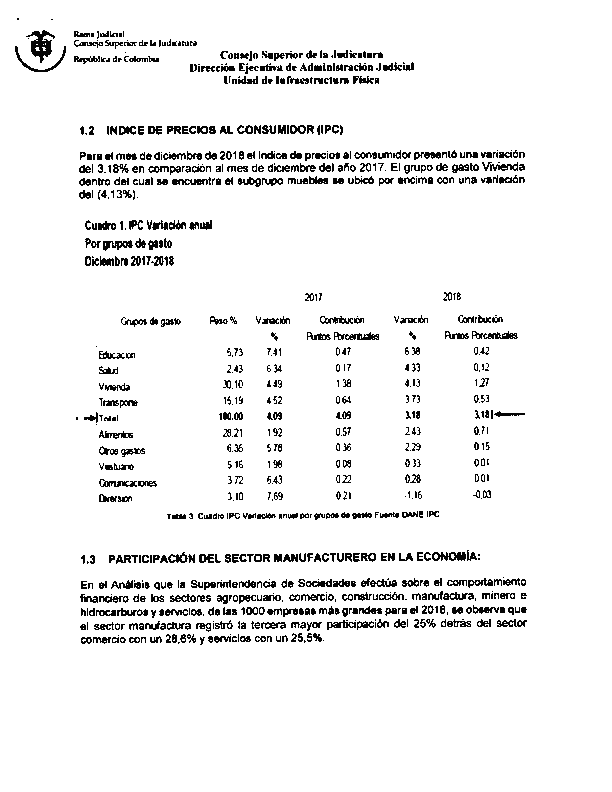

In [ ]:
# Mostramos resultado

encoded_line=cv2.imencode('.png', line_removed)[1]
display(IPython.display.Image(data=encoded_line))

In [ ]:
_, binary_roi = cv2.threshold(roi, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# Create a horizontal kernel to detect horizontal lines in the ROI
horizontal_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (30, 1))
# Use morphological opening to detect horizontal lines
detected_lines = cv2.morphologyEx(binary_roi, cv2.MORPH_OPEN, horizontal_kernel, iterations=2)

# Find contours of the detected lines
contours, _ = cv2.findContours(detected_lines, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
# Draw over the detected lines with black color
for contour in contours:
    cv2.drawContours(binary_roi, [contour], -1, (0, 0, 0), 2)

# Create a vertical kernel to detect vertical lines in the ROI
vertical_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1, 30))
# Use morphological opening to detect vertical lines
detected_lines = cv2.morphologyEx(binary_roi, cv2.MORPH_OPEN, vertical_kernel, iterations=2)

# Find contours of the detected lines
contours, _ = cv2.findContours(detected_lines, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
# Draw over the detected lines with black color
for contour in contours:
    cv2.drawContours(binary_roi, [contour], -1, (0, 0, 0), 2)

# Invert the binary ROI image to restore the original appearance minus the lines
line_removed_roi = cv2.bitwise_not(binary_roi)

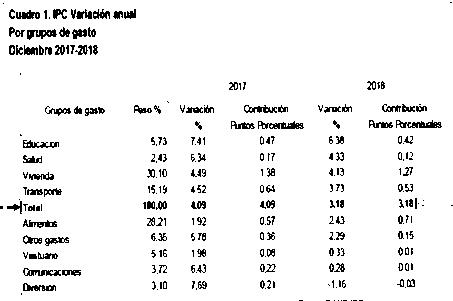

In [ ]:
# Mostramos resultado

encoded_line1=cv2.imencode('.png', line_removed_roi)[1]
display(IPython.display.Image(data=encoded_line1))

In [ ]:
!apt install tesseract-ocr-spa

import os
os.environ['TESSDATA_PREFIX'] = '/usr/share/tesseract-ocr/4.00/tessdata/'

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr-spa is already the newest version (1:4.00~git30-7274cfa-1.1).
0 upgraded, 0 newly installed, 0 to remove and 10 not upgraded.


In [ ]:
# Implementamos OCR

extracted_text_orig=pytesseract.image_to_string(image, lang='spa')
extracted_text_gray=pytesseract.image_to_string(gray, lang='spa')
extracted_text_blurred=pytesseract.image_to_string(blurred, lang='spa')
extracted_text_median_blured=pytesseract.image_to_string(median_blured, lang='spa')
extracted_text_binary_otsu=pytesseract.image_to_string(binary_otsu, lang='spa')
extracted_text_thresholded=pytesseract.image_to_string(thresholded_image, lang='spa')
extracted_text_morph_close=pytesseract.image_to_string(morph_close, lang='spa')
extracted_text_morph_open=pytesseract.image_to_string(morph_open, lang='spa')
extracted_text_edges=pytesseract.image_to_string(edges, lang='spa')
extracted_text_contrast_enhanced=pytesseract.image_to_string(contrast_enhanced, lang='spa')
extracted_text_hist_equalized=pytesseract.image_to_string(hist_equalized, lang='spa')
extracted_text_shadow_removed_gray=pytesseract.image_to_string(shadow_removed_gray, lang='spa')
extracted_text_line_removed=pytesseract.image_to_string(line_removed, lang='spa')
extracted_text_line_removed_roi=pytesseract.image_to_string(line_removed_roi, lang='spa')

In [ ]:
# Cerramos documento PDF

pdf_doc.close()

In [ ]:
# Imprimimos OCR con Original

print(extracted_text_orig)

y)

el Sapere deta Jara
optica de Comi, Consejo Superior dela Judicatura
Dirección Ejecutiva de Administración Judicial
"nidad de Infraestructura Física

 

12 INDICE DE PRECIOS AL CONSUMIDOR (IPC)

Para el mes de diciembre de 2018 el ncice de precios al consumidor presentó una variación
del 3,18% en comparación al mes de diciembre del año 2017. El grupo de gasto Vivienda
entro del cual se encuentra el subgrupo muebles se ubicó por encima con una variación
del (4.13%)

 

Cuadro 1.IPC Variación anal
Por grupos de gasto
Diciembre 2017-2018

 

7 a

 

Grapondagasto Paso Varón Conmucón — Varación bario
5 Pmtosfircemds 6 Artosfacemices

 

Er 30 TA nl E ve
Sa 20 6% am 4 or
Vinerda 2 138 48 7
Tarro 1519 482 06 am os

O us 30 10
renos E os 28 7]
Oros gastos 5% 57 0% 23 05
Vesturo 516 1% 00 0 o
Comunicaciones 3 $8 02 o 001

Des 300 769 on 146 am
Ta Y Caria PO Vaio 200 po upon de gas Fuí DAÑE PO

 

 

 

1.3. PARTICIPACIÓN DEL SECTOR MANUFACTURERO EN LA ECONOMÍA:

En el Andlsis que la Superi

In [ ]:
# Imprimimos OCR

print(extracted_text_gray)

y)

ama Jia
jo pero de a Juictora
Fepáticade Guiomar 7 Consejo Superior dela Judicatura.
Dirección Ejecutiva de Administración Judicial
Unidad de Infraestructura Física

 

 

12 INDICE DE PRECIOS AL CONSUMIDOR (IPC)

Para el mes de diciembre de 2018 el ncice de precios al consumidor presentó una variación
del 3,18% en comparación al mes de diciembre del año 2017. El grupo de gasto Vivienda
entro del cual se encuentra el subgrupo muebles se ubicó por encima con una variación
del (4.13%)

 

Cuadro .IPC Variación anal
Por grupos de gasto
Diciembre 2017-2018

 

am 2

 

Graondagasto Paso Varón Cortar — Varación Camba
5 Prtosrtrcemds 6 Artsfaceices

 

Er 35 TA nl E ve

Sl 20 6% 07 4 or

Vierda 2 4 138 48 7

Tara 1519 482 06 am os
7004 us 3 10

renos an 19 057 28 on

Oros gastos 5% 57 0% 23 05

Vesturo 516 1% 008 os o

Comunicaciones ES 02 os 001

Duecsión 300 769 on 146 am
Tas Y Curia PO Vea 200 po upon de gas Fuí DAÑE PC

 

 

 

1.3. PARTICIPACIÓN DEL SECTOR MANUFACTURERO EN LA ECONO

In [ ]:
# Imprimimos OCR

print(extracted_text_blurred)

y)

ama Jia
jo pero de a Juictora
Fepáticade Guiomar 7 Consejo Superior dela Judicatura.
Dirección Ejecutiva de Administración Judicial
Unidad de Infraestructura Física

 

 

12 INDICE DE PRECIOS AL CONSUMIDOR (IPC)

Para el mes de diciembre de 2018 el ncice de precios al consumidor presentó una variación
del 3,18% en comparación al mes de diciembre del año 2017. El grupo de gasto Vivienda
entro del cual se encuentra el subgrupo muebles se ubicó por encima con una variación
del (4.13%)

 

Cuadro .IPC Variación anal
Por grupos de gasto
Diciembre 2017-2018

 

am 2

 

Graondagasto Paso Varón Cortar — Varación Camba
5 Prtosrtrcemds 6 Artsfaceices

 

Er 35 TA nl E ve

Sl 20 6% 07 4 or

Vierda 2 4 138 48 7

Tara 1519 482 06 am os
7004 us 3 10

renos an 19 057 28 on

Oros gastos 5% 57 0% 23 05

Vesturo 516 1% 008 os o

Comunicaciones ES 02 os 001

Duecsión 300 769 on 146 am
Tas Y Curia PO Vea 200 po upon de gas Fuí DAÑE PC

 

 

 

1.3. PARTICIPACIÓN DEL SECTOR MANUFACTURERO EN LA ECONO

In [ ]:
# Imprimimos OCR

print(extracted_text_median_blured)

y)

ama Jia
jo pero de a Juictora
Fepáticade Guiomar 7 Consejo Superior dela Judicatura.
Dirección Ejecutiva de Administración Judicial
Unidad de Infraestructura Física

 

 

12 INDICE DE PRECIOS AL CONSUMIDOR (IPC)

Para el mes de diciembre de 2018 el ncice de precios al consumidor presentó una variación
del 3,18% en comparación al mes de diciembre del año 2017. El grupo de gasto Vivienda
entro del cual se encuentra el subgrupo muebles se ubicó por encima con una variación
del (4.13%)

 

Cuadro .IPC Variación anal
Por grupos de gasto
Diciembre 2017-2018

 

am 2

 

Graondagasto Paso Varón Cortar — Varación Camba
5 Prtosrtrcemds 6 Artsfaceices

 

Er 35 TA nl E ve

Sl 20 6% 07 4 or

Vierda 2 4 138 48 7

Tara 1519 482 06 am os
7004 us 3 10

renos an 19 057 28 on

Oros gastos 5% 57 0% 23 05

Vesturo 516 1% 008 os o

Comunicaciones ES 02 os 001

Duecsión 300 769 on 146 am
Tas Y Curia PO Vea 200 po upon de gas Fuí DAÑE PC

 

 

 

1.3. PARTICIPACIÓN DEL SECTOR MANUFACTURERO EN LA ECONO

In [ ]:
# Imprimimos OCR

print(extracted_text_binary_otsu)

y

Basa Jia
co period Judo
Rapita detona, Comiaejo Sapertor dela Jdicntara.
Dirección Ejecutiva de Adunlsración Judicial
Unidad de lafraescructar Péica

 

 

1,2. INDICE DE PRECIOS AL CONSUMIDOR (IPC)

Para eternos de diciembre de 2018 al Indica de precias al consumdor presentó una variación.
del 2.18% en comparación al mes de diciembre del año 2017. El grupo de gasto Vivienda
¡Sentra del cual sa encuentra el subgrupo mueblea ne ubicó por encima con una variación
del (4.13%).

 

Curdro 1. Variación anual
Por grupos de gasto
iciembra 20172018

 

201 me

 

Gaos degasto Pa Vara Cc O Varón Cobain
0% Pates trcemades 9 Arms caes

 

En” 75 var vs 04

san 28 5% om an 02

Vina 2 4 ve 2 17

arepa 119 452 06 an 95
CO] 40 7 |

Alerces an 1% E] 2 a]

Oro gases 5% ste 0% 29 1

Vetiro 51 18 00 o on

Conca E 0 es Do

Dieron 300 759 e. 106 20
TS Cad PO Vet 00 po pus de pasto Furia DEP

 

 

 

13. PARTICIPACIÓN DEL SECTOR MANUFACTURERO EN LA ECONOMÍA:

En el Andlcia que la Superintendencia de Soc

In [ ]:
# Imprimimos OCR sobre Umbralizado

print(extracted_text_thresholded)

 

o)
ade usa

 

 

Epaaacooas 7, Consejo Superior deta Judiestura.
Dirección Ejecutiva de Acndulstración Judicial
Unida ele Infraestructura Fiien

 

12. INDICE DE PRECIOS AL CONSUMIDOR (1PC)

Para el mes de diciembre da 2018 1 Indica de precios al consumidorpresantó una variación.
del 3.18% en comparación al mes de dicierabre del año 2017. El grupo de gasto Vivienda
anta del cual se encuentra el subgrupo iuobles so ubicó por encima con una variación
del (4,13%).

 

 

 

    

 

 

 

“Cuadro 1.10 Variación ano
Porgrupos de pasto
Dielembre 2017-2018
ar EN
Cuposiagao Paola Varón Comm Varón Carcn
5 Artrsficintados 6 tos once
Esc Era 0 530 en
E] 203 63 o 23 on
Viñenda DO as 13 40 2
Teaspor CAE] 06 an 083
as E] 0 NE 10)
Alcan 201% as 243 en
Oros ges 6% 50 035 23 015
Vestis 556 15 00 e o
Coruna 32 62 en 0 an
Pers 20 va 14 00

 

 

 

 

 

OS

33. PARTICIPACIÓN DEL SECTOR MANUFACTURERO EN La ECONOMÍA:

 

En el Análisis que la Suporintendencia de Sociadados efectía sobra al comportami

In [ ]:
# Imprimimos OCR

print(extracted_text_morph_close)

y

Basa Jia
co period Judo
Rapita detona, Comiaejo Sapertor dela Jdicntara.
Dirección Ejecutiva de Adunlsración Judicial
Unidad de lafraescructar Péica

 

 

1,2. INDICE DE PRECIOS AL CONSUMIDOR (IPC)

Para eternos de diciembre de 2018 al Indica de precias al consumdor presentó una variación.
del 2.18% en comparación al mes de diciembre del año 2017. El grupo de gasto Vivienda
¡Sentra del cual sa encuentra el subgrupo mueblea ne ubicó por encima con una variación
del (4.13%).

 

Curdro 1. Variación anual
Por grupos de gasto
iciembra 20172018

 

201 me

 

Gaos degasto Pa Vara Cc O Varón Cobain
0% Pates trcemades 9 Arms caes

 

En” 75 var vs 04

san 28 5% om an 02

Vina 2 4 ve 2 17

arepa 119 452 06 an 95
CO] 40 7 |

Alerces an 1% E] 2 a]

Oro gases 5% ste 0% 29 1

Vetiro 51 18 00 o on

Conca E 0 es Do

Dieron 300 759 e. 106 20
TS Cad PO Vet 00 po pus de pasto Furia DEP

 

 

 

13. PARTICIPACIÓN DEL SECTOR MANUFACTURERO EN LA ECONOMÍA:

En el Andlcia que la Superintendencia de Soc

In [ ]:
# Imprimimos OCR

print(extracted_text_morph_open)

y

Basa Jia
co period Judo
Rapita detona, Comiaejo Sapertor dela Jdicntara.
Dirección Ejecutiva de Adunlsración Judicial
Unidad de lafraescructar Péica

 

 

1,2. INDICE DE PRECIOS AL CONSUMIDOR (IPC)

Para eternos de diciembre de 2018 al Indica de precias al consumdor presentó una variación.
del 2.18% en comparación al mes de diciembre del año 2017. El grupo de gasto Vivienda
¡Sentra del cual sa encuentra el subgrupo mueblea ne ubicó por encima con una variación
del (4.13%).

 

Curdro 1. Variación anual
Por grupos de gasto
iciembra 20172018

 

201 me

 

Gaos degasto Pa Vara Cc O Varón Cobain
0% Pates trcemades 9 Arms caes

 

En” 75 var vs 04

san 28 5% om an 02

Vina 2 4 ve 2 17

arepa 119 452 06 an 95
CO] 40 7 |

Alerces an 1% E] 2 a]

Oro gases 5% ste 0% 29 1

Vetiro 51 18 00 o on

Conca E 0 es Do

Dieron 300 759 e. 106 20
TS Cad PO Vet 00 po pus de pasto Furia DEP

 

 

 

13. PARTICIPACIÓN DEL SECTOR MANUFACTURERO EN LA ECONOMÍA:

En el Andlcia que la Superintendencia de Soc

In [ ]:
# Imprimimos OCR

print(extracted_text_edges)

gen
y Eee
NS Exmrajasagaros det deste

o
tios de lofiesatea so

o o

Ponlo lcd Ac at pa
dia]
EE O CR ARO ma co can Es a aio hn
eo

Caria E Vta
ll
SRA
E ES
E

CS E

   
 

      
    

 

 

 

E sua Tar 1 as ul
EN] 2 e E pa 1
Vasa E] 1 49 E]
p 6 18 [o] EU) pS]
o a a e e |
ES E] a 20 El
Espro mw 1] E] pl
pS 53 1 pal pl ha]
Sosa 39 50 pa 1] 5]
Loza ESB] 5 1 E]

Pg

DANUFASTURERO Ex La seamos

ds olas Casal
a oia la
odo
dl coa menea ¡agas la Berea maya! patezotón dl 5 Estás 3 assi
PS

 

rea eE

 
      

  



In [ ]:
# Imprimimos OCR

print(extracted_text_contrast_enhanced)

Y)

ama Jia
jo pero de a Juictra
Fepúbicade Colomba 7 Consejo Superior dela Judicatura.
Dirección Ejecutiva de Administración Judicial

Unidad de Infraestructura Fisica

 

 

1.2. INDICE DE PRECIOS AL CONSUMIDOR (1PC)

 

a el mes de diciembre de 2018 el índice de precios al consumidor presentó una variación
del 3,18% en comparación al mes de diciembre del año 2017. El grupo de gasto Vivienda
deniro del cul s encuentra el subgrupo muebles so UtIÓ por encima con una veriaión
del (4.13%).

 

Cuadro .IPC Variación anal
Por grupos de gasto
Diciembre 2017-2018

 

a EN

 

Cupos degasto Pasos Vanación  Conmiucin — Varación Combi
%  Prtosfircemds %  Artsfacemiaes

 

Er 55 TA na al ve
Sal 20 6% am 4 or
Vierda E 138 48 ww
Taro 1519 482 06 am os
0040 us 30 3 —
renos E 057 28 7]
Oros gastos 5% 57 0% 23 015
Vesuro 516 198 00 0 15
Comniicones 12 sm 02 o o
Dies 300 769 on 146 2

 

 

 

Ta Y Cani PO Van 200 po Upon de gas Fuí DAÑE PO

1.3. PARTICIPACIÓN DEL SECTOR MANUFACTURERO EN LA ECONOMÍA:


In [ ]:
# Imprimimos OCR

print(extracted_text_hist_equalized)

In [ ]:
# Imprimimos OCR

print(extracted_text_shadow_removed_gray)

ama Jia

+ ls detona
WS) rerac— p,, CoteoSapro dela laa
Dirección Ejecutiva de Administración Judicial
"Unidad de Infraestructura Física

 

1.2. INDICE DE PRECIOS AL CONSUMIDOR (1PC)

Para el mes de diciembre de 2018 el indice de precios al consumidor presentó una variación
del 3,18% en comparación al mes de diciembre del año 2017. El grupo de gasto Vivienda
deniro dl cul se encuentra l subgrupo muebles se UI por encima con na variación
del (4,13%)

 

"Cuadro 1.IPC Variación anal
Por grupos de gasto
Diciembre 2017-2018

 

a EN

 

Gaupondagasto — Paso% Varón Conmbacin — Varación Cambio
%  Ptosfincemds %  Artosfacemices

 

 

 

aca 55 TA 0 al ve
Sal 20 6% am 4 or
Vivenda E 138 48 ww
Tarro 1519 48 06 am os
LO us 30 3 —
renos E os 28 en
Oros gastos 5% 5 0% 23 015
Vesturo 516 198 00 0 15
Comnicicones 3 e 02 os o
Dies 300 769 on 146 2

 

Ta Curia PO Vean 20 po upon gas Fuí DAÑE PO

1.3. PARTICIPACIÓN DEL SECTOR MANUFACTURERO EN LA ECONOMÍA:

En el Andlsis que la Superintendencia de So

In [ ]:
# Imprimimos OCR

print(extracted_text_line_removed)

Bara Jia

Y) Enano
ia cado apro deta ear
Mv DR airis
a

 

 

fraestractar Pica

1,2. INDICE DE PRECIOS AL CONSUMIDOR (IPC)

Para eternos de diciembre de 2018 al Indica de precios al consumdor presentó una variación
del 2.18% en comparación al mes de diciembre del año 2017. El grupo de gasto Vivienda
¿Sentra del cual 38 encuentra el subgrupo muebloa ne ubicó por encima con una variación
del (4.13%).

Curdro 11€ Variación anal
Por grupos de gasto
Ciclembre 20172018

201 me.

Gs degasto Pe Varón Corcó Va Conoci
% o Pates ceder 9 Aros ces,

Eáucacen E] 1 sn 0%
san 28 5% om an 02
Vina 2 4 ve 2 17
Trap ms 42 06 an os

ofre m0 40% 20 y AAKÁ
Alreres an 1% os 20 on
Oro gases. 5% se 0% 29 1.
Vetiro 51 1% 00 o om
Conca E 0 es Do
Daesen 210 759 en 16 am

rua CURA PO Ut propor uo de po Fuera AE IP

13. PARTICIPACIÓN DEL SECTOR MANUFACTURERO EN LA ECONOMÍA:

 

financiero de los sectores agropecuario, comercio, construcción. manufaciura, minero e
hidrocarburos y aemcios, de las 1000 empresas más gr

In [ ]:
# Imprimimos OCR

print(extracted_text_line_removed_roi)

Cundro 1.1 Variación aval
Porgrupos de gasto
Olclembre 20172018

Ed 2

Cupos dagaro Po Varacón Corman Vamcin Condori
% Ptos rcsmades 9 Amos cc

"isucacon A] cn e 0%
San 20 5% om 19 0
Veda E ve mu 12
Tara m9 42 06 m 0
molto! m0 a 200 7] qu
Ao an 1% os 2 on
Oo gases 6% ste 0% 19 01
Va 51 10 00 103 o0
Conca 32 sa e es a

Desea 0 sa e. 16 am

 

